# **Financial inclusion Across Kenya, Rwanda, Uganda and Tanzania**

# 1.0) Project Overview

Financial inclusion is the process of providing access to financial services and products to individuals and businesses that may not have had access to these services in the past. This can include access to bank accounts, loans, insurance, and other financial products. Financial inclusion is important because it can help to reduce poverty and inequality, improve the stability and resilience of communities, and promote economic growth and development

Financial inclusion is positioned prominently as an enabler of several Sustainable Development Goals. It is featured as a target in eight out seventeen Sustainable Development Goals.These include;

SDG1: Eradicating poverty

SDG 2: Ending hunger, achieving food security and promoting sustainable agriculture.

SDG 3: Profiting health and well-being.

SDG 5: Achieving gender equality and economic empowerment of women

SDG 8: Promoting economic growth and jobs.

SDG 9: Supporting industry, innovation, and infrastructure.

SDG 10: Reducing inequality.

SDG 17: Strengthening the means of implementation.

There is academic evidence that financial inclusion models can support overall economic growth and the achievement of broader development goals [Economic Research - Ekonomska Istraživanja, 2020.](https://www.tandfonline.com/doi/full/10.1080/1331677X.2020.1748508)  When more people have access to financial services, they are able to invest in their businesses, communities, and families, which can lead to increased productivity, innovation, and economic growth.



# 1.1) Problem Statement

Ownership of bank accounts is considered to be an indicator of financial inclusion and in this project, we are going to analyze and predict individuals most likely to have or use a bank account

# 1.2) Objectives
## a) Main objective
The objective of this project is to develop a predictive model that determines if an individual is likely to have a bank account or not.

## b) Specific objectives

1. To create a machine learning model that will make the predictions.

2. The model should can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda.

3. Identifying if demographic factors lead to individuals owning a bank account

4. Predicting key demographic factors that drive individuals to own bank accounts.

# 1.3)Specifying the question


Who is likely to have or not have a bank account?

# 1.4) Defining the metric of success

1. Perform Exploratory Data Analysis on [Financial Inclusion in Africa data](https://zindi.africa/competitions/financial-inclusion-in-africa/data).

2. Project will be considered successful if we train a machine learning model that will be able to predict whether an individual is likely to own a bank account.

3. Use Mean Absolute error as the evaluation metric, where 1 indicates that the individual does have a bank account and 0 indicates that they do not.

# 1.5) Data Relevance and Validation

The data available is relevant for the intended analysis since it contains demographic information covering 2016 to 2018. More information can be found here:

[FinAccess Kenya 2018.](https://www.fsdkenya.org/blogs-publications/publications/2018-annual-report/) 

[Finscope Rwanda 2016.](http://www.statistics.gov.rw/publication/finscope-rwanda-2016) 

[Finscope Tanzania 2017.](http://www.fsdt.or.tz/finscope/)

[Finscope Uganda 2018.](http://fsduganda.or.ug/finscope-2018-survey-report/)

# 1.6) Understanding the Context

The data set we are to work with contains the following columns:
1. **country**: Country interviewee is in.

2. **year**:Year survey was done in

3. **uniqueid**:Unique identifier for each interviewee

4. **Has a Bank account**:Yes, No

5. **Type of Location**:Type of location: Rural, Urban

6. **Cell Phone Access**:If interviewee has access to a cellphone: Yes, No

7. **household_size**:Number of people living in one house

8. **Respondent Age**:The age of the interviewee

9. **gender_of_respondent**:Gender of interviewee: Male, Female

10. **The relathip with head**:The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

11. **marital_status**:The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know

12. **Level of Educuation**:Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA

13. **Type of Job**:Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


# 1.7) The Experimental Design Taken

 Below are the steps taken in this analysis
 
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Multivriate analysis
 7. Implementing the solution by training a model that will give accurate predictions
 

# 2) Reading the data

In [1]:
# dataframe and plotting
import pandas as pd #used to analyze data
import numpy as np #used for working with arrays
import seaborn as sns #helps you explore and understand your data using stattistical graphs, it is built on matplotlib
import matplotlib #used for creating interactive visualizations 
from matplotlib import pyplot as plt #API for matplotlib and is used for graphic visualizations
import plotly as px
import plotly.io as pio
pio.renderers
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots



In [2]:
# Loading the data into a pandas dataframe
train = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\zindi\Train.csv')
test = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\zindi\Test.csv')
ss = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\zindi\SampleSubmission.csv')


# 3) Understanding the data

In [3]:
# Preview the first five rows of the train set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Preview the first five rows of the test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
#Checking the number of entries in train and test sets:

print("The train dataset contains {} rows, and {} columns".format(train.shape[0], train.shape[1]))
print("The test dataset contains {} rows, and {} columns".format(test.shape[0], test.shape[1]))


The train dataset contains 23524 rows, and 13 columns
The test dataset contains 10086 rows, and 12 columns


In [6]:
# Checking the summary information of the data, the datatypes of the various columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


**Observation**

The output shows the list of all columns with their data types and the number of non-null values in each column for both trai and test sets. From the summary, we are able to see both data sets have similar values and there are no null values 

In [8]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



In [9]:
# getting summary statisctics for both categorical and numerical columns
train.describe(include = 'all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


**Observation**

We have both categorical and continous variables

In [10]:
#Checking the number of records in our train dataset
train.count()

country                   23524
year                      23524
uniqueid                  23524
bank_account              23524
location_type             23524
cellphone_access          23524
household_size            23524
age_of_respondent         23524
gender_of_respondent      23524
relationship_with_head    23524
marital_status            23524
education_level           23524
job_type                  23524
dtype: int64

We have no null values

In [11]:
#Checking distinct elements in each column
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

**Observation**

We can see the counts of unique elements in each column

In [12]:
#Checking for duplicates
train.duplicated().sum()

0

**Observation:** There are no duplicates

In [13]:
#Checking for the value counts for country column
train['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

**Observation:** We have four countries namely Kenya, Tanzania, Rwanda and Uganda

In [14]:
#Checking for the value counts for year column
train['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

**Observation:** The information available for analysis runs from 2016 to 2018

In [15]:
train.columns #checking column names

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

**Observation:** column names are in the correct format

# 3) Data Cleaning

In [16]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

**Observation:** all columns are in their correct data types




# 4) Checking for Outliers

In [17]:
!pip install -U kaleido

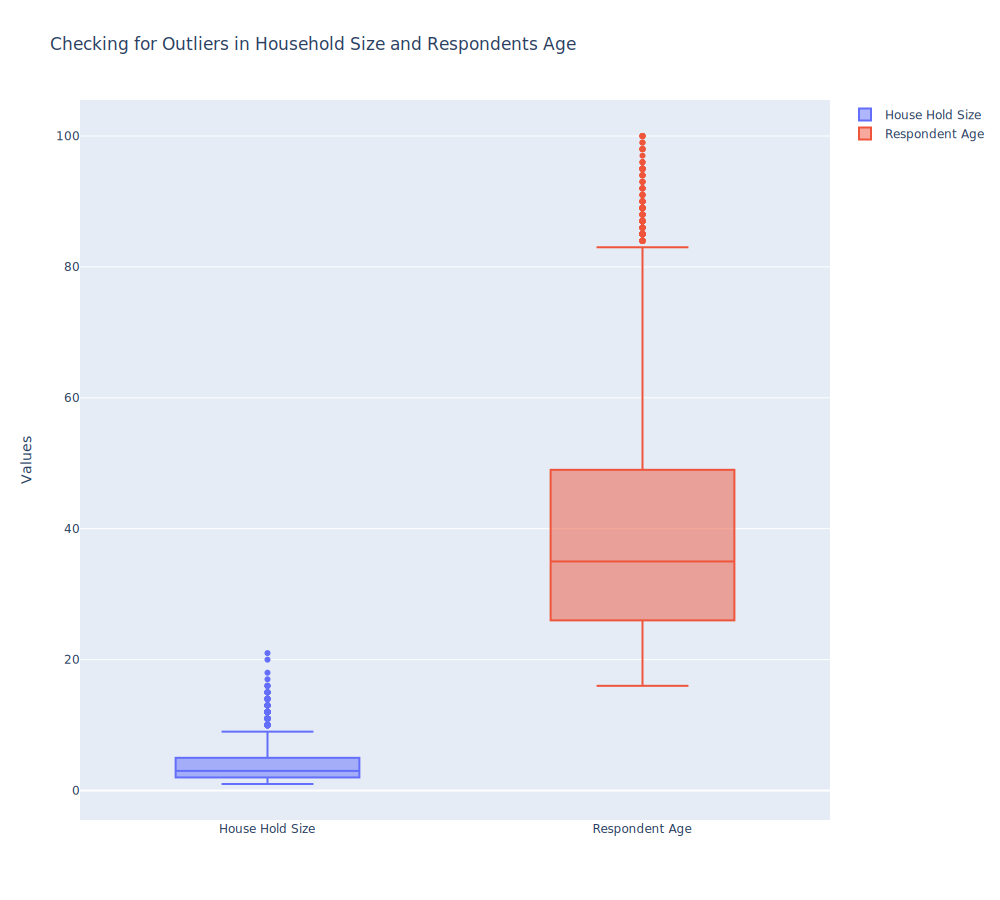

In [18]:
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = 'svg'
fig = go.Figure()

fig.add_trace(
    go.Box(y= train['household_size'], name="House Hold Size"),
)
fig.add_trace(
    go.Box(y= train['age_of_respondent'], name="Respondent Age"),
)
fig.update_layout(
    title_text="Checking for Outliers in Household Size and Respondents Age",
    yaxis_title_text="Values",
    height=900, 
    width=1000
)
fig.show()

**Observation**

* In the house hold size column, we have outliers of house holds between 10 and 21
* In the age of respondents column,the ages between 84 and 100 is above the third quartile

I have chosen to retain the above identified outliers since it is information that is crucial in our analysis.

# 5) Univariate Analysis

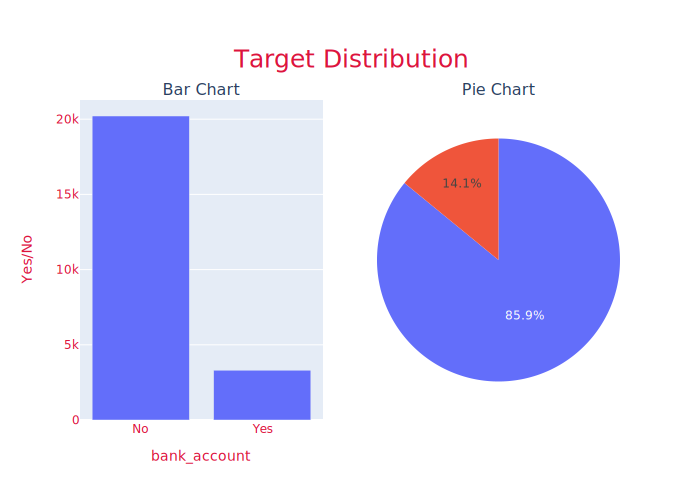

In [19]:
fig = make_subplots(rows=1, cols=2, specs = [[{'type' : 'xy'}, {'type' : 'domain'}]], subplot_titles = ['Bar Chart', 'Pie Chart'])

fig.add_trace(
    go.Bar(x= train['bank_account'].value_counts().index,
           y= train['bank_account'].value_counts().values),
 
    row=1, col=1
)
fig.add_trace(go.Pie(labels = train['bank_account'].value_counts().index,
                     values = train['bank_account'].value_counts().values),
              
              
    row=1, col=2
    
)
fig.update_layout({ 'title' : { 'text' : 'Target Distribution',
                               'x' : 0.5, 'y' : 0.9,
                               'font_size' : 25, 'font_color' : 'Crimson'}},
                  showlegend = False)
fig.update_xaxes(title_text = 'bank_account', color = 'Crimson')
fig.update_yaxes(title_text = 'Yes/No', color = 'Crimson')
marker = dict (color = 'LightSeaGreen')
pio.renderers.default = 'svg'
fig.show()


**Observation**



* Our target variable is categorical and groups the respondents in two groups. ie has a bank account, does not have a bank account.

* Out of the 23,316 respondents, The bar chart shows 20,024 respondents responded No, illustrating this number of respondents do not have bank accounts and only 3,292 respondents had bank accounts.

* The percentage as shown in the pie chart of those who had bank accounts is 14.1 % and those who did not have bank accounts is 85.9%

* We can see our target variable is heavily imbalanced



# 6) Bivariate Analysis

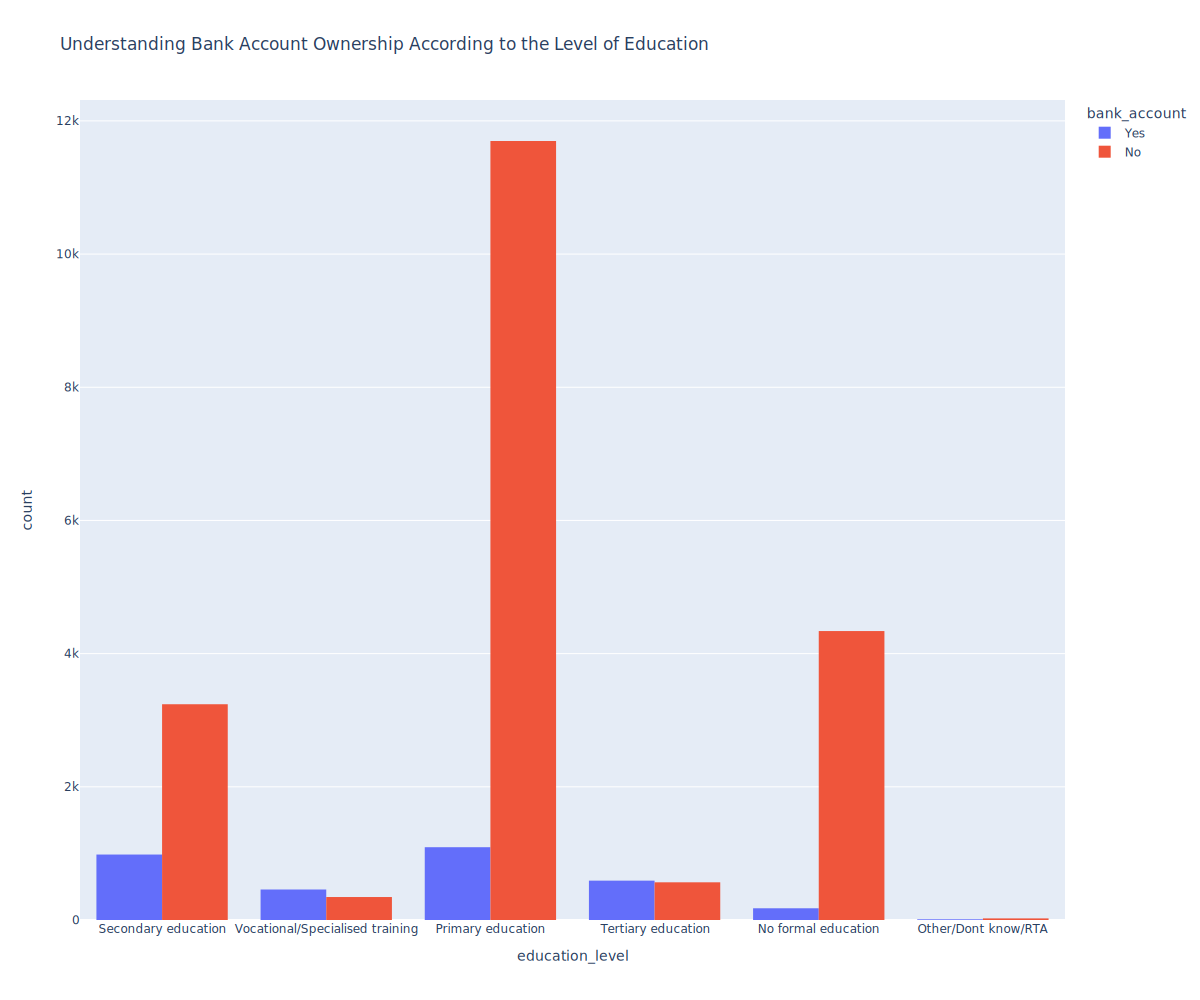

In [21]:
px.histogram(train, x= 'education_level', color="bank_account",
             barmode='group',height = 1000, width = 1200,
             title = 'Understanding Bank Account Ownership According to the Level of Education')

**Observation** : 

1. In all education levels, respodents with no bank accounts are more compared with those who have bank accounts.


**Observation:**
1. Self employed individuals lead in bank account ownership followed by farming and fishing, the formally employed.
2. Suprisingly, there are also individuals with no bank accounts that are formally employed by bthe government

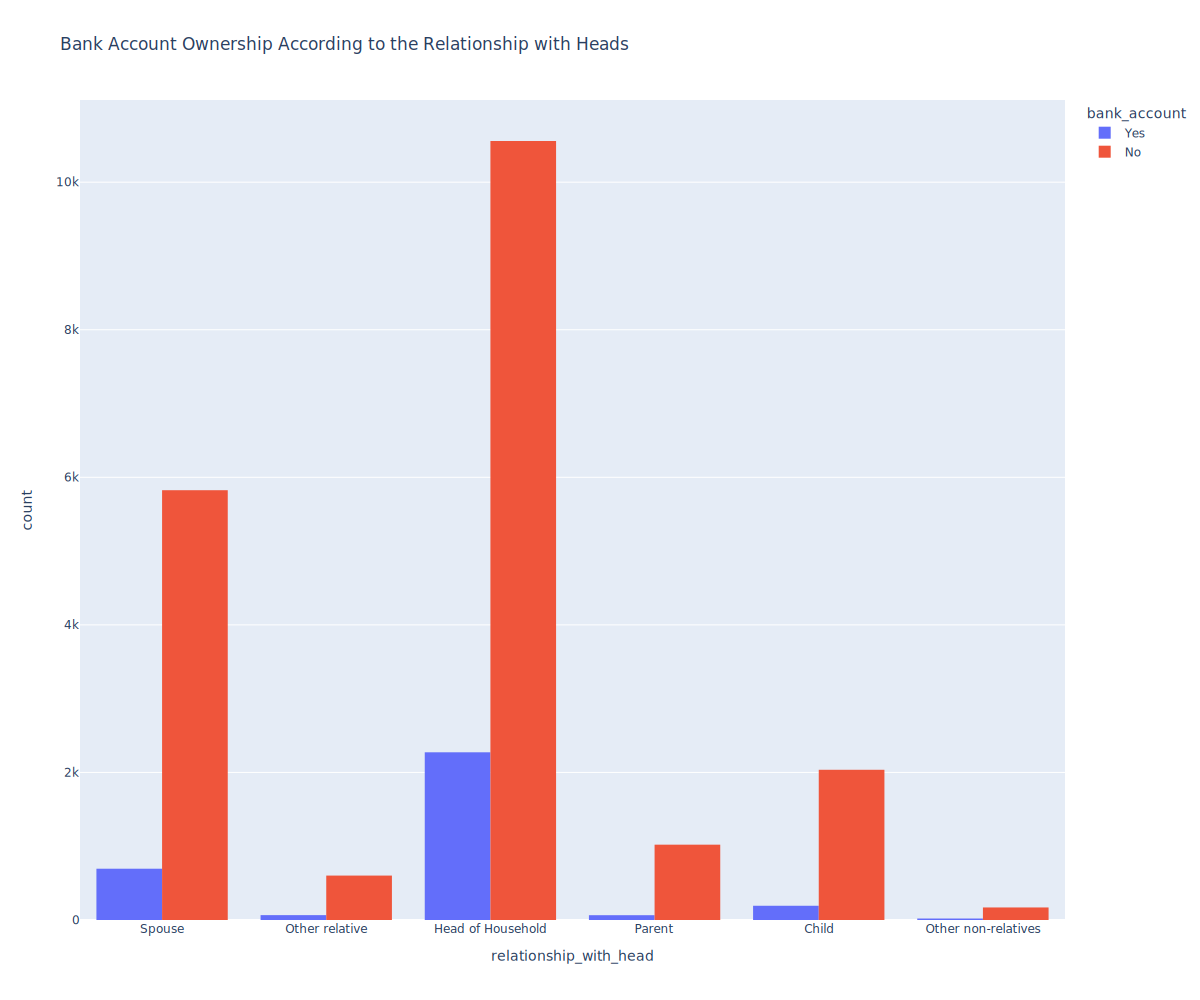

In [23]:
px.histogram(train, x= 'relationship_with_head', color="bank_account",
             barmode='group',height = 1000, width = 1200,
             title = 'Bank Account Ownership According to the Relationship with Heads')

**Observation**
1. Head of the household lead in bank account ownership and spouse comes second

In [61]:
#Comparison of having a bank acccount in various countries
pd.crosstab([train.bank_account], train.country, margins=True).style.background_gradient(cmap='Pastel1_r')

country,Kenya,Rwanda,Tanzania,Uganda,All
bank_account,,,,,
0,4547,7732,6013,1920,20212
1,1521,1003,607,181,3312
All,6068,8735,6620,2101,23524


**Observation**

1. Rwanda had the highest number of respondents totalling to 8.735 followed by Tanzania with 6,620. Kenya was third with 6,068 and lastly Uganda with 2,101 respondents

2. Kenya had the highest number of respondents that owned bank accounts followed by Rwanda. Tanzania was third and lastly Uganda

In [66]:
#Comparison of having a bank acccount according to cellphone access
pd.crosstab([train.bank_account], train.cellphone_access, margins=True).style.background_gradient(cmap='Pastel1_r')

cellphone_access,No,Yes,All
bank_account,,,
0,5966,14246,20212
1,104,3208,3312
All,6070,17454,23524


**Observation**

1. Out of 20,212 respondents 14,246 had access to cellphones while 5,966 had no access to cellphones
2. Out of 14,246 respondents that had access to cellphones only 3,208 had bank accounts

In [63]:
#Comparison of having a bank acccount according to location type
pd.crosstab([train.bank_account], train.location_type, margins=True).style.background_gradient(cmap='Pastel1_r')

location_type,Rural,Urban,All
bank_account,,,
0,12672,7540,20212
1,1671,1641,3312
All,14343,9181,23524


**Obbservation**
1. Outof 20,212 observations, 12,672 were from rural areas and 7,540 were from urban areas
2. Bank account ownership in both areas is almost equal

In [67]:
#Comparison of having a bank acccount according marital status
pd.crosstab([train.bank_account], train.marital_status, margins=True).style.background_gradient(cmap='Pastel1_r')

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,All
bank_account,,,,,,
0,1842,6,8883,7017,2464,20212
1,234,2,1866,966,244,3312
All,2076,8,10749,7983,2708,23524


**Observation**
1. Individuals that were Married / Living together had the highest number of bank account ownership followed by single people, widowed came third and divorced came fourth

In [68]:
#Comparison of having a bank acccount according to gender
pd.crosstab([train.bank_account], train.gender_of_respondent, margins=True).style.background_gradient(cmap='Pastel1_r')

gender_of_respondent,Female,Male,All
bank_account,,,
0,12395,7817,20212
1,1482,1830,3312
All,13877,9647,23524


**Observation**
1. 12,395 respondents were female and 7,817 were male
2. There was no significant difference in bank account ownership in both genders

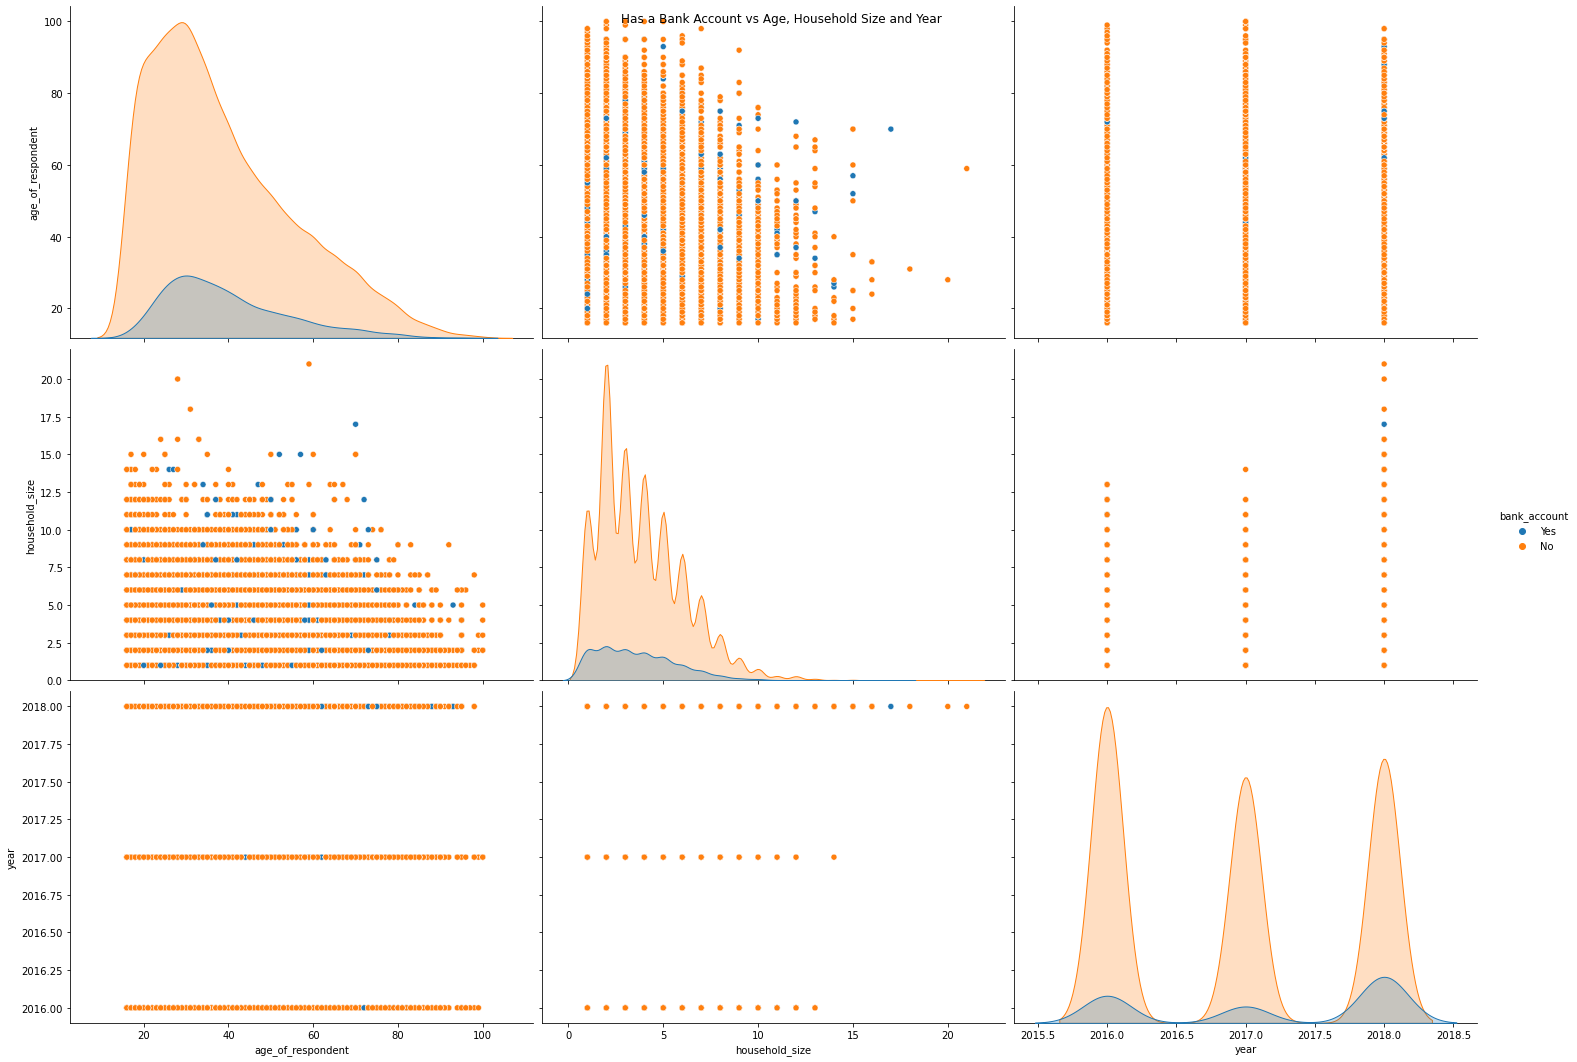

In [24]:
pp = sns.pairplot(train[['bank_account', 'age_of_respondent', 'household_size', 'year']],hue="bank_account", height= 5, aspect= 1.4)
pp.fig.suptitle("Has a Bank Account vs Age, Household Size and Year");

**Observation:**
1. **Age of respondents -** Most people with bank accounts are between the age of 20 and 35. The distribution is not normally distributed as it is skewed to the right

2. **Household size -**  Most household sizes with 1 to 3 people had more people owning bank accounts compared to larger households. The distribution is not normaly distributed as it is skewed to the right

3. **year -** more people owned bank accounts in 2018 compared to 2016 and 2017. The distribution is normally distributed.There is also no linear relationship between household size and year as well aws age of respondents

4. There is no linear relationship between household size and age of respondents



# 7) Implementing the Solution

### a) Data Pre-Processing

In [25]:
# Step 1: Preparing the data
#Checking our columns data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


**Observation**
*   We have a total of 13 columns. house hold type, year and respondent age are in their correct data type while the rest are categorical columns but in object data type

In [26]:
#we need to make a copy of the original dataset
train_copy = train.copy(deep=True) # Modifications to the data of the copy will not be reflected in the original object
train_copy.head(3) #previewing the first three rows

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [27]:
#The next step is changing data types of the categorical variables to category from object
train_copy= train_copy[['country', 'year', 'uniqueid', 'bank_account',
                              'location_type','cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']].astype('category')
# Making the 3 columns in interger format to remain in the same dtype
for col in ['year', 'household_size', 'age_of_respondent']:
  train_copy[col]=train_copy[col].astype('int64')

print(train_copy.dtypes)

country                   category
year                         int64
uniqueid                  category
bank_account              category
location_type             category
cellphone_access          category
household_size               int64
age_of_respondent            int64
gender_of_respondent      category
relationship_with_head    category
marital_status            category
education_level           category
job_type                  category
dtype: object


**Observation:** from above we can see that the categorical variables data types indicate as category instead of object which makes them easier to use. the other 3 are rightly indicated as integers

In [28]:
# a function to get all columns of object type
cat_list = train_copy.select_dtypes(include = "category").columns
print (cat_list)

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')


In [29]:
# The next thing we do is encoding the data
from sklearn import preprocessing
lab_encoder = preprocessing.LabelEncoder()

In [30]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in cat_list:
    train_copy[feat] = le.fit_transform(train_copy[feat])

print (train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int32
 1   year                    23524 non-null  int64
 2   uniqueid                23524 non-null  int32
 3   bank_account            23524 non-null  int32
 4   location_type           23524 non-null  int32
 5   cellphone_access        23524 non-null  int32
 6   household_size          23524 non-null  int64
 7   age_of_respondent       23524 non-null  int64
 8   gender_of_respondent    23524 non-null  int32
 9   relationship_with_head  23524 non-null  int32
 10  marital_status          23524 non-null  int32
 11  education_level         23524 non-null  int32
 12  job_type                23524 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 1.4 MB
None


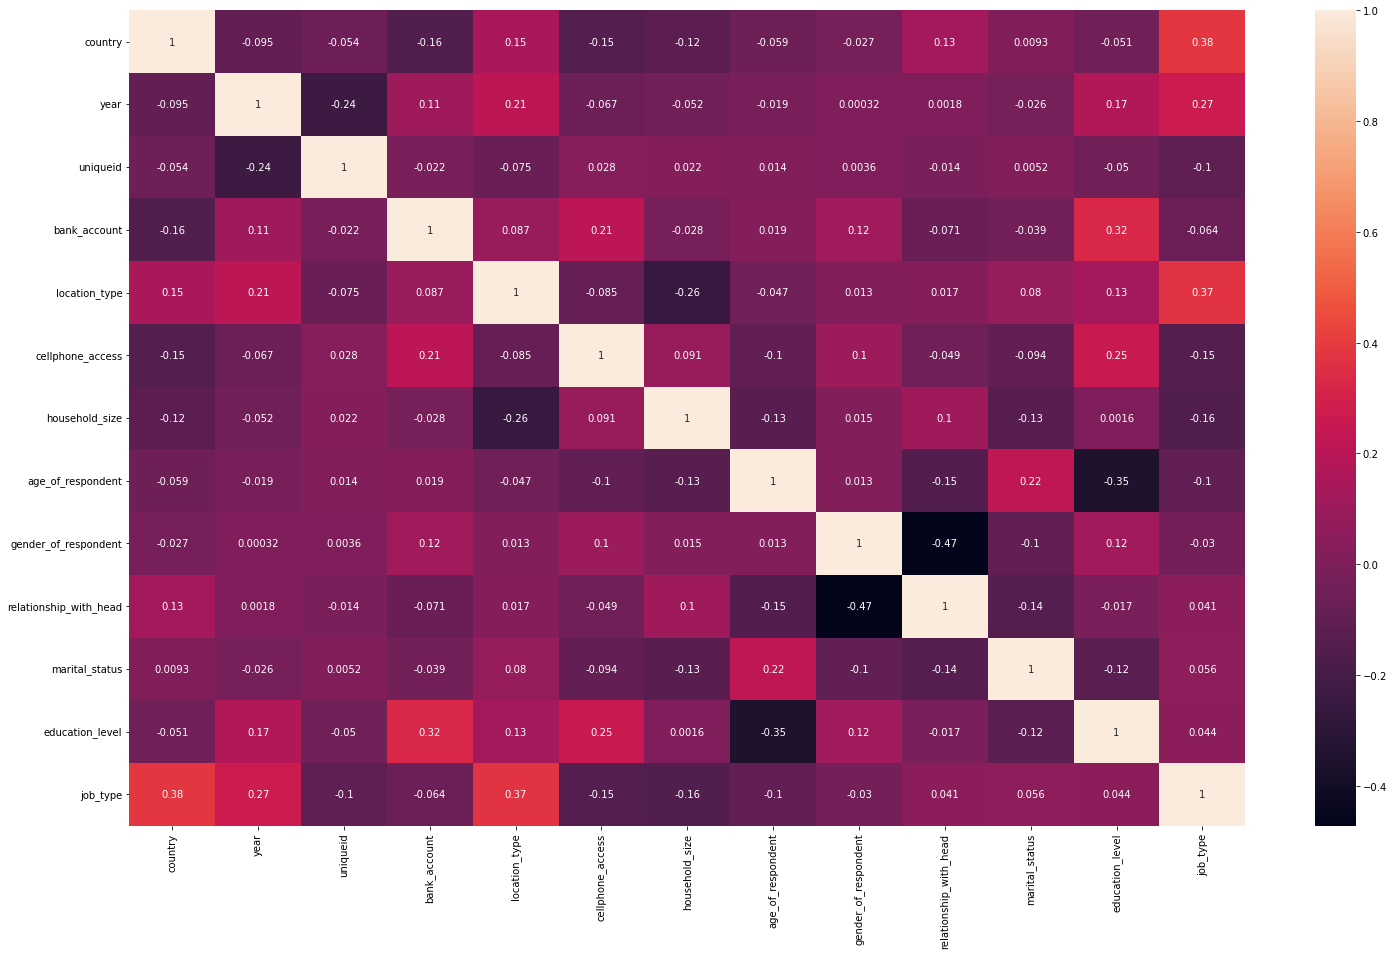

In [31]:
# Checking for multi-collinearity
plt.figure(figsize=(25,15))
sns.heatmap(train_copy.corr(), annot=True)
plt.show()

### b) Train & Test Split

In [32]:
# dividing the data into features and then assigning the the indepedent and depedent variables to X and y
X = train_copy.drop(['bank_account'], axis = 1).values
y = train_copy["bank_account"]

In [33]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = train_copy[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
     # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [34]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train_copy['bank_account'])

#Separate training features from target
X_train = train_copy.drop(['bank_account'], axis=1)
y_train = train_copy['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [35]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [36]:
# This step entails dividing the datasets into training and test sets
# We start by importing the neccessary libray for the same

# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3,  stratify = y)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

## d) Modelling

The evaluation metric for this project will be the percentage of survey respondents for whom the model predicts the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [37]:
#modeling using Xgboost
from sklearn import model_selection
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [38]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)



[[1962   60]
 [ 193  138]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2022
           1       0.70      0.42      0.52       331

    accuracy                           0.89      2353
   macro avg       0.80      0.69      0.73      2353
weighted avg       0.88      0.89      0.88      2353

Error rate of XGB classifier:  0.10752231194220141


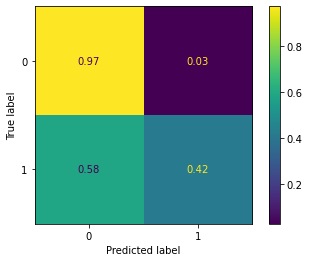

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


print(confusion_matrix(y_val, xg_y_model))

print(classification_report(y_val, xg_y_model))

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))


# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(xg_model,X_Val, y_val,normalize='true');

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

## d) Optimizing our model by hyper-parameter tuning

In [40]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters

param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[20:30:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}


Error rate of the XGB classifier:  0.10879728006799827


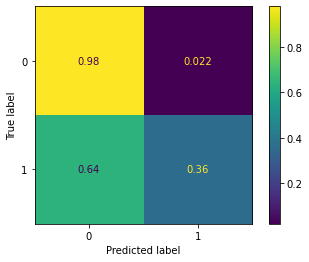

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model1 = XGBClassifier(min_child_weight=1, gamma=1, subsample=1, max_depth=3)

xgb_model1.fit(X_Train, y_Train)
y_pred1 = xgb_model1.predict(X_Val)

# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(xgb_model1,X_Val, y_val,normalize='true');

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred1))

We will be using our base model to implement our solution since it perfomed better compared to the tuned model

# 8)Conclusion 



1. Ownership of bank accounts in both urban and rural areas is almost equal

2. Most of the population across the countries have cell phones but do not have accounts. 

3. Gender does not really affect the likelihood of opening an account. There is a slight difference between the number of males and females who have accounts.

4. Those that are self employed and in the informal sector are more likely to have bank accounts.

5. Those that are married and living together are also most likely to have bank accounts.

6. In all education levels, respodents with no bank accounts are more compared with those who have bank accounts.

7. Head of the household is most likely to own a bank account

8. Kenya had the highest number of respondents that owned bank accounts followed by Rwanda,Tanzania was third and lastly Uganda

9. Individuals that were Married / Living together had the highest number of bank account ownership followed by single people, widowed came third and divorced came fourth







# 9)Recommendation 

1. Even though ownership of bank accounts in both urban and rural areas is almost equal, the overall number of respondents that had bank accounts is very low. Only 14.1 % had bank accounts and those who did not have bank accounts were 85.9%. Banks and other financial institutions can persuade individuals in both urban and rural areas to purchase their products through community involvement. Customers care about social responsibility and being involved with service projects will attract more potential customers to purchase your brand.



2. Encouraging the use of digital financial services: Banks and other financial institutions should embrace social media. Most respondents had access to cell phones and did not own bank accounts. They should encourage the use of digital financial services, such as mobile banking and e-payments, can make it easier for people to access financial services, especially in areas where traditional financial institutions may not be present.


3. Increasing access to financial services: This can be done by increasing the number of financial institutions, such as banks and microfinance institutions, in underserved areas, as well as by providing training and education to people on how to use financial services.


4. Reducing barriers to access: This can involve reducing the costs of financial services, such as fees and charges, as well as making it easier for people to open bank accounts and access credit.


5. Promoting financial literacy: This can involve providing training and education to people on how to manage their money, save for the future, and use financial products and services effectively.


Overall, financial inclusion is an important goal that can help to reduce poverty and inequality, promote economic growth and development, and contribute to the achievement of the Sustainable Development Goals. By working together to promote financial inclusion, we can create a more sustainable and equitable future for all.







